In [1]:
import matplotlib.pyplot as plt
import numpy as np
import veloxchem as vlx

In [2]:
mol_str = """
C        0.00000000    0.00000000    0.00000000
O        0.00000000    0.00000000    2.70000000
"""
molecule = vlx.Molecule.read_molecule_string(mol_str, units="au")
basis = vlx.MolecularBasis.read(molecule, "cc-pVDZ", ostream=None)

In [3]:
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()

scf_results = scf_drv.compute(molecule, basis)

In [4]:
C = scf_results["C_alpha"]
D = scf_results["D_alpha"] + scf_results["D_beta"]

In [5]:
norb = basis.get_dimensions_of_basis()
nocc = molecule.number_of_alpha_electrons()

print("Number of contracted basis functions:", norb)
print("Number of doubly occupied molecular orbitals:", nocc)

Number of contracted basis functions: 28
Number of doubly occupied molecular orbitals: 7


In [6]:
D_mo = np.zeros((norb, norb))

for i in range(nocc):
    D_mo[i, i] = 2.0

D_ao = np.einsum("ap, pq, bq -> ab", C, D_mo, C)

In [7]:
np.testing.assert_allclose(D_ao, D, atol=1e-12)

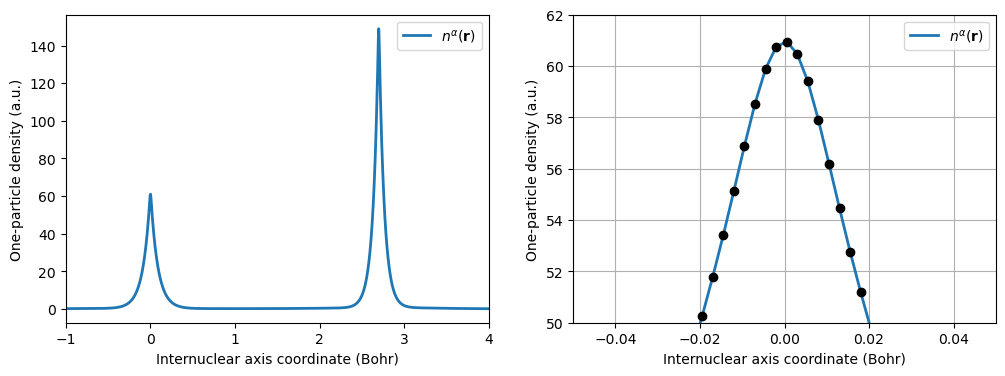

In [8]:
vis_drv = vlx.VisualizationDriver()

# list of coordinates in units of Bohr
n = 2000
coords = np.zeros((n, 3))
z = np.linspace(-1, 4, n)
coords[:, 2] = z
one_part_den = vis_drv.get_density(coords, molecule, basis, scf_drv.density, "alpha")

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(z, one_part_den, lw=2, label=r"$n^\alpha(\mathbf{r})$")
plt.setp(plt.gca(), xlim=(-1, 4))
plt.legend()
plt.xlabel(r"Internuclear axis coordinate (Bohr)")
plt.ylabel(r"One-particle density (a.u.)")

plt.subplot(1, 2, 2)
plt.plot(z, one_part_den, lw=2, label=r"$n^\alpha(\mathbf{r})$")
plt.plot(z, one_part_den, "ko")
plt.grid(True)
plt.setp(plt.gca(), xlim=(-0.05, 0.05), ylim=(50, 62))
plt.legend()
plt.xlabel(r"Internuclear axis coordinate (Bohr)")
plt.ylabel(r"One-particle density (a.u.)")

plt.show()

In [9]:
n = 100
origin = np.zeros((n, 3))
coords = np.zeros((n, 3))
z = np.linspace(-1, 4, n)
coords[:, 2] = z

two_part_den_aa = vis_drv.get_two_particle_density(
    origin, coords, molecule, basis, scf_drv.density, "alpha", "alpha"
)
two_part_den_ab = vis_drv.get_two_particle_density(
    origin, coords, molecule, basis, scf_drv.density, "alpha", "beta"
)

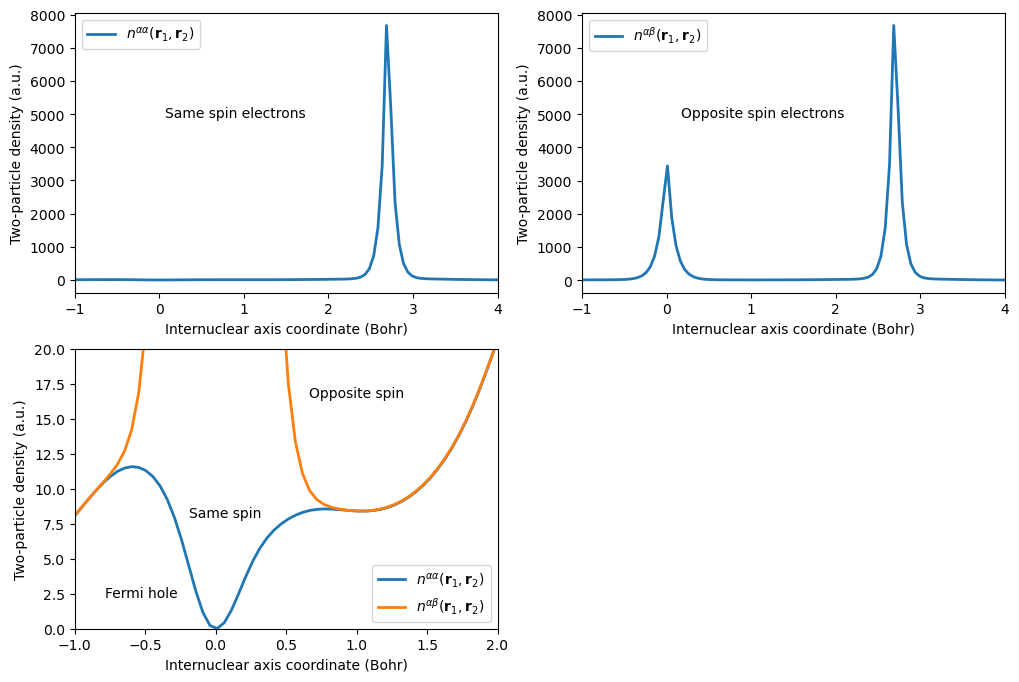

In [10]:
fig = plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(
    z, two_part_den_aa, lw=2, label=r"$n^{\alpha\alpha}(\mathbf{r}_1, \mathbf{r}_2)$"
)
plt.setp(plt.gca(), xlim=(-1, 4))
plt.legend()
plt.figtext(0.2, 0.75, r"Same spin electrons")
plt.xlabel(r"Internuclear axis coordinate (Bohr)")
plt.ylabel(r"Two-particle density (a.u.)")

plt.subplot(2, 2, 3)
plt.plot(
    z, two_part_den_aa, lw=2, label=r"$n^{\alpha\alpha}(\mathbf{r}_1, \mathbf{r}_2)$"
)
plt.plot(
    z, two_part_den_ab, lw=2, label=r"$n^{\alpha\beta}(\mathbf{r}_1, \mathbf{r}_2)$"
)
plt.setp(plt.gca(), xlim=(-1, 2), ylim=(0, 20))
plt.legend()
plt.figtext(0.22, 0.25, r"Same spin")
plt.figtext(0.15, 0.15, r"Fermi hole")
plt.figtext(0.32, 0.4, r"Opposite spin ")
plt.xlabel(r"Internuclear axis coordinate (Bohr)")
plt.ylabel(r"Two-particle density (a.u.)")

plt.subplot(2, 2, 2)
plt.plot(
    z, two_part_den_ab, lw=2, label=r"$n^{\alpha\beta}(\mathbf{r}_1, \mathbf{r}_2)$"
)
plt.setp(plt.gca(), xlim=(-1, 4))
plt.legend()
plt.figtext(0.63, 0.75, r"Opposite spin electrons")
plt.xlabel(r"Internuclear axis coordinate (Bohr)")
plt.ylabel(r"Two-particle density (a.u.)")

plt.show()